In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.display import Image
import pandasql as pdsql

%matplotlib inline

In [18]:
# read csv into panda data frame to see values read from file into data frame
subway=pd.read_csv('mta-spring2016-rev01.csv') 

#set up and execute sql to get average number of entries for a station-time on a weekday
pysql = lambda q: pdsql.sqldf(q, globals())
pd.options.display.float_format = '{:,.2f}'.format



In [80]:
#Query to extract time, average(entries) and average(exits) data for 14 ST-UNION SQ station, for weekdays

str5 = "select station,time,avg(entries),avg(exits) from subway where station ='14 ST-UNION SQ' and (day < 5) group by time order by time;"
df5 = pysql(str5)
df5
 

,STATION,TIME,avg(entries),avg(exits)
0,14 ST-UNION SQ,1,"14,049.50","4,439.38"
1,14 ST-UNION SQ,5,"1,291.53",612.00
2,14 ST-UNION SQ,9,"8,648.07","17,880.40"
3,14 ST-UNION SQ,13,"14,700.75","24,993.90"
4,14 ST-UNION SQ,17,"28,550.77","20,830.17"
5,14 ST-UNION SQ,21,"39,146.08","22,462.30"


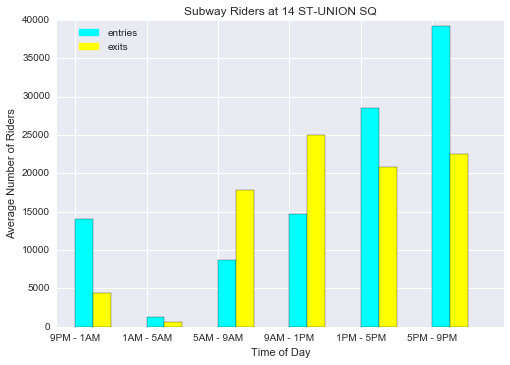

In [207]:
#Chart4: UNION SQUARE flow through the day
width = 1
x = df5['TIME']
plt.bar(x,df5['avg(entries)'], color = 'cyan', label = 'entries', width =1)
plt.bar(x+width,df5['avg(exits)'], color='yellow',label = 'exits', width =1)

plt.xlabel('Time of Day')
plt.ylabel('Average Number of Riders')

plt.xticks(x,['9PM - 1AM', '1AM - 5AM', '5AM - 9AM', '9AM - 1PM', '1PM - 5PM', '5PM - 9PM'])
plt.title('Subway Riders at 14 ST-UNION SQ')

patch1 = mpatches.Patch(color = 'cyan', label = 'entries')
patch2 = mpatches.Patch(color = 'yellow',label = 'exits')


plt.legend(bbox_to_anchor = (0.2,1), handles = [patch1, patch2])
plt.show()





In [84]:
str_union_day="select day,avg(entries),avg(exits) from subway where (day < 5) and station='14 ST-UNION SQ'and time='21' group by day"
df_union_day = pysql(str_union_day)
df_union_day

,DAY,avg(entries),avg(exits)
0,0,"36,624.58","20,116.83"
1,1,"40,511.67","22,485.33"
2,2,"41,304.67","23,435.92"
3,3,"39,607.92","22,828.92"
4,4,"37,681.58","23,444.50"


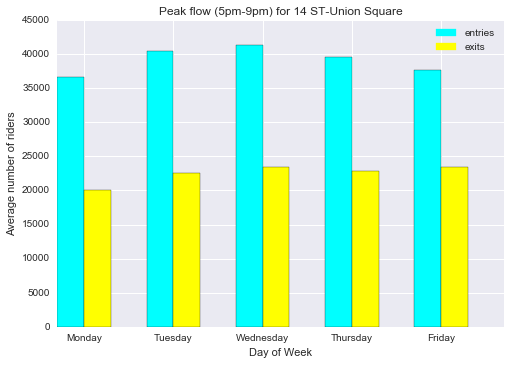

In [211]:
#Chart for Union Sq by time of Day
width = 0.3
fig, ax = plt.subplots()

x = df_union_day['DAY']
plt.bar(x,df_union_day['avg(entries)'], color='cyan',label = 'entries', width = 0.3)
plt.bar(x+width,df_union_day['avg(exits)'], color='yellow',label = 'exits',width = 0.3)

plt.xlabel('Day of Week')
plt.ylabel('Average number of riders')
plt.title('Peak flow (5pm-9pm) for 14 ST-Union Square')
plt.xticks(x+width,['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])


patch1 = mpatches.Patch(color = 'cyan', label = 'entries')
patch2 = mpatches.Patch(color = 'yellow',label = 'exits')


plt.legend(handles = [patch1, patch2])
plt.show()

In [128]:
str_allstations = "select station,sum(entries),sum(exits) from subway group by station order by sum(exits) desc LIMIT 20;"
df_allstations = pysql(str_allstations)
df_allstations

,STATION,sum(entries),sum(exits)
0,34 ST-PENN STA,12476632,10648177
1,GRD CNTRL-42 ST,10618672,9428334
2,34 ST-HERALD SQ,9109199,8007551
3,14 ST-UNION SQ,8098847,6958567
4,86 ST,8150360,6854298
5,23 ST,9018285,6802362
6,TIMES SQ-42 ST,7406450,6779154
7,42 ST-PORT AUTH,7864415,5559764
8,FULTON ST,5765828,4796521
9,59 ST,5899151,4741133


In [148]:
#Query to rank all station by volume of commuters; top 20 selected
str_allstations20 = "select station,avg(entries),avg(exits) from subway group by station order by avg(exits) desc LIMIT 20;"
df_allstations20 = pysql(str_allstations20)
df_allstations20

,STATION,avg(entries),avg(exits)
0,34 ST-HERALD SQ,"18,145.81","15,951.30"
1,14 ST-UNION SQ,"16,101.09","13,834.13"
2,TIMES SQ-42 ST,"14,753.88","13,504.29"
3,34 ST-PENN STA,"12,414.56","10,595.20"
4,59 ST,"11,751.30","9,444.49"
5,GRD CNTRL-42 ST,"10,565.84","9,381.43"
6,47-50 STS ROCK,"8,183.52","8,556.71"
7,59 ST COLUMBUS,"11,111.13","8,387.63"
8,CHAMBERS ST,"10,247.19","7,336.00"
9,FLUSHING-MAIN,"9,022.05","7,240.19"


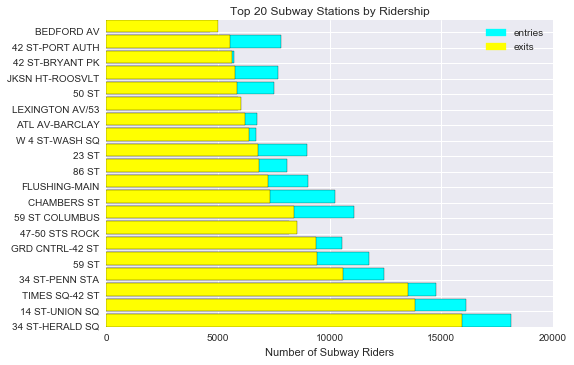

In [205]:
#Chart for stations ranking

from pylab import *


x = range(0, len(df_allstations20['avg(entries)']))
plt.figure(1)
plt.yticks(x,df_allstations20['STATION'])
plt.barh(x, df_allstations20['avg(entries)'], color='cyan',label = 'entries' )
plt.barh(x, df_allstations20['avg(exits)']+width, color='yellow',label = 'exits')
xlabel('Number of Subway Riders')
title('Top 20 Subway Stations by Ridership')

patch1 = mpatches.Patch(color = 'cyan', label = 'entries')
patch2 = mpatches.Patch(color = 'yellow',label = 'exits')


plt.legend(handles = [patch1, patch2])
show()



In [155]:
#Query to get flow of commuters from all subway stations by day of week
str_all_day = 'select day,avg(entries),avg(exits) from subway group by day order by day;'
df_all_day = pysql(str_all_day)
df_all_day

,DAY,avg(entries),avg(exits)
0,0,"2,237.74","1,640.44"
1,1,"2,467.69","1,812.08"
2,2,"2,528.11","1,857.43"
3,3,"2,527.82","1,860.07"
4,4,"2,436.37","1,806.54"
5,5,"1,474.47","1,154.06"
6,6,"1,166.29",920.97


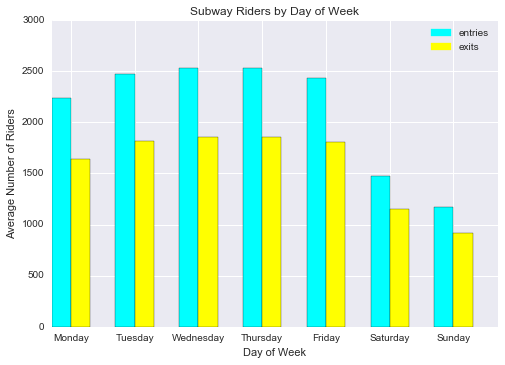

In [210]:
#Chart for flow of commuters by day of week
width = 0.3
fig, ax = plt.subplots()

x = df_all_day['DAY']
plt.bar(x,df_all_day['avg(entries)'], color='cyan',label = 'entries',width = 0.3)
plt.bar(x+width,df_all_day['avg(exits)'], color='yellow',label = 'exits',width = 0.3)

plt.xlabel('Day of Week')
plt.ylabel('Average Number of Riders')
plt.title('Subway Riders by Day of Week')
plt.xticks(x+width,['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


patch1 = mpatches.Patch(color = 'cyan', label = 'entries')
patch2 = mpatches.Patch(color = 'yellow',label = 'exits')


plt.legend(handles = [patch1, patch2])
plt.show()

In [167]:
#Query to get commuter flow by time of day, all subway stations included
str_all_time = 'select time,avg(entries),avg(exits) from subway where time in(0,4,8,12,16,20) group by time;'
df_all_time = pysql(str_all_time)
df_all_time

,TIME,avg(entries),avg(exits)
0,0,"1,624.43","1,355.08"
1,4,270.25,289.80
2,8,"1,787.95",962.37
3,12,"3,304.92","2,731.41"
4,16,"3,003.10","2,169.14"
5,20,"4,276.83","3,158.70"


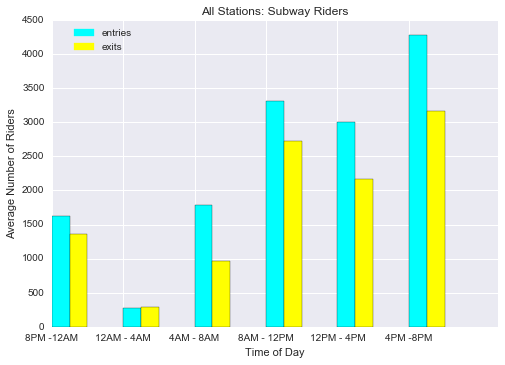

In [212]:
#Chart for commuter flow by time of day, all subway stations

width = 1
x = df_all_time['TIME']
plt.bar(x,df_all_time['avg(entries)'], color = 'cyan', label = 'entries',width = 1)
plt.bar(x+width,df_all_time['avg(exits)'], color='yellow',label = 'exits',width = 1)

plt.xlabel('Time of Day')
plt.ylabel('Average Number of Riders')
plt.xticks(x,['8PM -12AM', '12AM - 4AM', '4AM - 8AM', '8AM - 12PM', '12PM - 4PM', '4PM -8PM', '8PM-12AM'])
plt.title('All Stations: Subway Riders')

patch1 = mpatches.Patch(color = 'cyan', label = 'entries')
patch2 = mpatches.Patch(color = 'yellow',label = 'exits')


plt.legend(bbox_to_anchor = (0.2,1), handles = [patch1, patch2])
plt.show()